In [111]:
import numpy as np

In [155]:
if __name__ == '__main__':
    N=int(input('please input Simpson node n:')) 
    a=float(input('please input the left value of interval:'))
    b=float(input('please input the right value of interval:'))

please input Simpson node n:11
please input the left value of interval:6
please input the right value of interval:0


In [156]:
def simps(a,b,N):
    if N % 2 != 1:
        raise ValueError("N must be an odd integer.")
    dx = (b-a)/(N-1)
    A=np.zeros(N)
    for i in range(0,N):
        if i==0:
            A[0]=dx/3
        elif i==N-1:
            A[N-1]=dx/3
        elif i % 2 ==1:
            A[i]=(4/3)*dx
        else:
            A[i]=(2/3)*dx
    return A, dx

In [157]:
A =simps(a,b,N)[0] #coefficent 
dx= simps(a,b,N)[1] #dx

In [158]:
x=np.zeros(N)
for i in range(0,N):
    x[i]=a+dx*(i)

In [159]:
x, A

(array([6. , 5.4, 4.8, 4.2, 3.6, 3. , 2.4, 1.8, 1.2, 0.6, 0. ]),
 array([-0.2, -0.8, -0.4, -0.8, -0.4, -0.8, -0.4, -0.8, -0.4, -0.8, -0.2]))

In [160]:
k=np.zeros((N, N))
for i in range (1,N+1):
    for j in range (1,N+1):
        k[i-1,j-1]=np.cos((x[i-1]+x[j-1]))
print ("the values of kernel function is :\n",k)

the values of kernel function is :
 [[ 0.84385396  0.39349087 -0.19432991 -0.71426565 -0.98468786 -0.91113026
  -0.51928865  0.05395542  0.60835131  0.95023259  0.96017029]
 [ 0.39349087 -0.19432991 -0.71426565 -0.98468786 -0.91113026 -0.51928865
   0.05395542  0.60835131  0.95023259  0.96017029  0.63469288]
 [-0.19432991 -0.71426565 -0.98468786 -0.91113026 -0.51928865  0.05395542
   0.60835131  0.95023259  0.96017029  0.63469288  0.08749898]
 [-0.71426565 -0.98468786 -0.91113026 -0.51928865  0.05395542  0.60835131
   0.95023259  0.96017029  0.63469288  0.08749898 -0.49026082]
 [-0.98468786 -0.91113026 -0.51928865  0.05395542  0.60835131  0.95023259
   0.96017029  0.63469288  0.08749898 -0.49026082 -0.89675842]
 [-0.91113026 -0.51928865  0.05395542  0.60835131  0.95023259  0.96017029
   0.63469288  0.08749898 -0.49026082 -0.89675842 -0.9899925 ]
 [-0.51928865  0.05395542  0.60835131  0.95023259  0.96017029  0.63469288
   0.08749898 -0.49026082 -0.89675842 -0.9899925  -0.73739372]
 [ 0.

In [161]:
f=np.zeros(N)
for i in range(1,N+1):
    f[i-1]=0
print ("the values of function f is : \n",f)

the values of function f is : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [162]:
def solve_eigen(): 
    B=np.zeros((N,N))
    for i in range(1,N+1):
        for j in range(1,N+1):
                if i == j:
                    B[i-1,j-1]=A[j-1]*k[i-1,j-1]
                else:
                    B[i-1,j-1]=A[j-1]*k[i-1,j-1]
    eigenval, eigenvec=np.linalg.eig(B) 
    return eigenval , eigenvec

In [163]:
lamda=np.zeros(N)
lamda=solve_eigen()
lamda

(array([-2.86373850e+00+0.00000000e+00j,  3.13573937e+00+0.00000000e+00j,
        -3.75509105e-16+0.00000000e+00j, -5.26601768e-16+0.00000000e+00j,
         3.25514957e-16+0.00000000e+00j, -1.45797017e-16+0.00000000e+00j,
         1.45193576e-17+9.83495601e-17j,  1.45193576e-17-9.83495601e-17j,
         1.03876468e-16+0.00000000e+00j, -5.17443403e-17+0.00000000e+00j,
        -2.28763586e-17+0.00000000e+00j]),
 array([[-0.40062575+0.j        , -0.12487325+0.j        ,
         -0.61042551+0.j        , -0.4629532 +0.j        ,
          0.52152264+0.j        , -0.27733349+0.j        ,
          0.28498064-0.2623637j ,  0.28498064+0.2623637j ,
         -0.47480632+0.j        , -0.48444138+0.j        ,
          0.10986568+0.j        ],
        [-0.26643755+0.j        , -0.33952998+0.j        ,
         -0.06806848+0.j        ,  0.26117278+0.j        ,
         -0.40931345+0.j        ,  0.03135228+0.j        ,
         -0.01243668-0.02021409j, -0.01243668+0.02021409j,
         -0.04878233+

In [164]:
ya=lamda[1][1]
ya

array([-0.26643755+0.j        , -0.33952998+0.j        ,
       -0.06806848+0.j        ,  0.26117278+0.j        ,
       -0.40931345+0.j        ,  0.03135228+0.j        ,
       -0.01243668-0.02021409j, -0.01243668+0.02021409j,
       -0.04878233+0.j        , -0.06428937+0.j        ,
        0.03594528+0.j        ])

In [165]:
yy=np.zeros(N)
for i in range(1,N+1):
    yy[i-1]=np.cos(x[i-1])
yy


array([ 0.96017029,  0.63469288,  0.08749898, -0.49026082, -0.89675842,
       -0.9899925 , -0.73739372, -0.22720209,  0.36235775,  0.82533561,
        1.        ])

/Users/mohsenbahremani/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


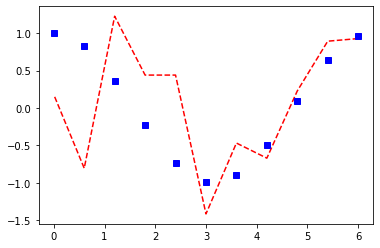

In [173]:
import matplotlib.pyplot as plt
plt.plot(x, 3*lamda[1][6], 'r--', x, yy, 'bs')
plt.show();

In [ ]:
import numpy as np

### Input variable

if __name__ == '__main__':
    N=int(input('please input Simpson node n:')) 
    a=float(input('please input the left value of interval:'))
    b=float(input('please input the right value of interval:'))

#### Simpson’s rule 

def simps(a,b,N):
    if N % 2 != 1:
        raise ValueError("N must be an odd integer.")
    dx = (b-a)/(N-1)
    A=np.zeros(N)
    for i in range(0,N):
        if i==0:
            A[0]=dx/3
        elif i==N-1:
            A[N-1]=dx/3
        elif i % 2 ==1:
            A[i]=(4/3)*dx
        else:
            A[i]=(2/3)*dx
    return A, dx
A =simps(a,b,N)[0] #coefficent 
dx= simps(a,b,N)[1] #dx
x=np.zeros(N)
for i in range(0,N):
    x[i]=a+dx*(i)

### kernel 
k=np.zeros((N, N))
for i in range (1,N+1):
    for j in range (1,N+1):
        k[i-1,j-1]=np.cos((x[i-1]+x[j-1]))

### f(x),  Right hand side = 0
f=np.zeros(N)
for i in range(1,N+1):
    f[i-1]=0

### Solving Eigenvalue and eigen function
    
def solve_eigen(): 
    B=np.zeros((N,N))
    for i in range(1,N+1):
        for j in range(1,N+1):
                if i == j:
                    B[i-1,j-1]=A[j-1]*k[i-1,j-1]
                else:
                    B[i-1,j-1]=A[j-1]*k[i-1,j-1]
    eigenval, eigenvec=np.linalg.eig(B) 
    return eigenval , eigenvec
import matplotlib.pyplot as plt
plt.plot(x, 3*lamda[1][6], 'r--', x, yy, 'bs')
plt.show();